# Abalone Case Study

We have to predict the rings of each abalone which will lead us to the age of that abalone. We have to add 1.5 in the ring that we have predicted to get the age in years of the abalone.The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.The original stated problem is estimate the age an abalone, which can be determined from the number of rings in their shell. However, counting the number of rings in an abalone shell is an expensive method. Thus, one possible solution is predict the number of rings of an abalone from characteristics like height, diameter, lenght and weight measurements.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('abalone.csv')
df

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

In [3]:
pd.set_option('display.max_rows', None)

In [4]:
df.shape  #checking the data dimension

(4177, 9)

In [5]:
df.dtypes  #checking the datatypes of each column

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

As we can see the 'sex' column is in object form so now we have to convert it in float form.

In [6]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [7]:
df

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       2   0.455     0.365   0.095        0.5140          0.2245   
1       2   0.350     0.265   0.090        0.2255          0.0995   
2       0   0.530     0.420   0.135        0.6770          0.2565   
3       2   0.440     0.365   0.125        0.5160          0.2155   
4       1   0.330     0.255   0.080        0.2050          0.0895   
5       1   0.425     0.300   0.095        0.3515          0.1410   
6       0   0.530     0.415   0.150        0.7775          0.2370   
7       0   0.545     0.425   0.125        0.7680          0.2940   
8       2   0.475     0.370   0.125        0.5095          0.2165   
9       0   0.550     0.440   0.150        0.8945          0.3145   
10      0   0.525     0.380   0.140        0.6065          0.1940   
11      2   0.430     0.350   0.110        0.4060          0.1675   
12      2   0.490     0.380   0.135        0.5415          0.2175   
13      0   0.535     0.405   0.145        0.6845          0.2725   
14      0   0.470     0.355   0.100        0.4755          0.1675   
15      2   0.500     0.400   0.130        0.6645          0.2580   
16      1   0.355     0.280   0.085        0.2905          0.0950   
17      0   0.440     0.340   0.100        0.4510          0.1880   
18      2   0.365     0.295   0.080        0.2555          0.0970   
19      2   0.450     0.320   0.100        0.3810          0.1705   
20      2   0.355     0.280   0.095        0.2455          0.0955   
21      1   0.380     0.275   0.100        0.2255          0.0800   
22      0   0.565     0.440   0.155        0.9395          0.4275   
23      0   0.550     0.415   0.135        0.7635          0.3180   
24      0   0.615     0.480   0.165        1.1615          0.5130   
25      0   0.560     0.440   0.140        0.9285          0.3825   
26      0   0.580     0.450   0.185        0.9955          0.3945   
27      2   0.590     0.445   0.140        0.9310          0.3560   
28      2   0.605     0.475   0.180        0.9365          0.3940   
29      2   0.575     0.425   0.140        0.8635          0.3930   
30      2   0.580     0.470   0.165        0.9975          0.3935   
31      0   0.680     0.560   0.165        1.6390          0.6055   
32      2   0.665     0.525   0.165        1.3380          0.5515   
33      0   0.680     0.550   0.175        1.7980          0.8150   
34      0   0.705     0.550   0.200        1.7095          0.6330   
35      2   0.465     0.355   0.105        0.4795          0.2270   
36      0   0.540     0.475   0.155        1.2170          0.5305   
37      0   0.450     0.355   0.105        0.5225          0.2370   
38      0   0.575     0.445   0.135        0.8830          0.3810   
39      2   0.355     0.290   0.090        0.3275          0.1340   
40      0   0.450     0.335   0.105        0.4250          0.1865   
41      0   0.550     0.425   0.135        0.8515          0.3620   
42      1   0.240     0.175   0.045        0.0700          0.0315   
43      1   0.205     0.150   0.055        0.0420          0.0255   
44      1   0.210     0.150   0.050        0.0420          0.0175   
45      1   0.390     0.295   0.095        0.2030          0.0875   
46      2   0.470     0.370   0.120        0.5795          0.2930   
47      0   0.460     0.375   0.120        0.4605          0.1775   
48      1   0.325     0.245   0.070        0.1610          0.0755   
49      0   0.525     0.425   0.160        0.8355          0.3545   
50      1   0.520     0.410   0.120        0.5950          0.2385   
51      2   0.400     0.320   0.095        0.3030          0.1335   
52      2   0.485     0.360   0.130        0.5415          0.2595   
53      0   0.470     0.360   0.120        0.4775          0.2105   
54      2   0.405     0.310   0.100        0.3850          0.1730   
55      0   0.500     0.400   0.140        0.6615          0.2565   
56      2   0.445     0.350   0.120        0.4425          0.1920   
57  

As we can see now the 'sex' column is in float form. Now we can use it for further analysis and learning the dataset.

In [8]:
#checking Statistical sumary
df.describe()

Sex       Length     Diameter       Height  Whole weight  \
count  4177.000000  4177.000000  4177.000000  4177.000000   4177.000000   
mean      1.052909     0.523992     0.407881     0.139516      0.828742   
std       0.822240     0.120093     0.099240     0.041827      0.490389   
min       0.000000     0.075000     0.055000     0.000000      0.002000   
25%       0.000000     0.450000     0.350000     0.115000      0.441500   
50%       1.000000     0.545000     0.425000     0.140000      0.799500   
75%       2.000000     0.615000     0.480000     0.165000      1.153000   
max       2.000000     0.815000     0.650000     1.130000      2.825500   

       Shucked weight  Viscera weight  Shell weight        Rings  
count     4177.000000     4177.000000   4177.000000  4177.000000  
mean         0.359367        0.180594      0.238831     9.933684  
std          0.221963        0.109614      0.139203     3.224169  
min          0.001000        0.000500      0.001500     1.000000  
25%          0.186000        0.093500      0.130000     8.000000  
50%          0.336000        0.171000      0.234000     9.000000  
75%          0.502000        0.253000      0.329000    11.000000  
max          1.488000        0.760000      1.005000    29.000000

In [9]:
 #checking the null values in dataset
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

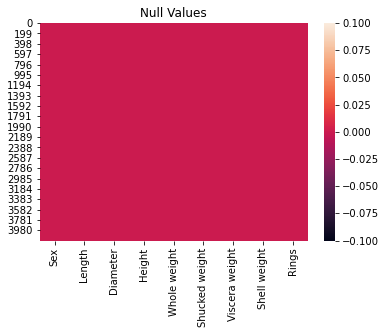

In [10]:
#checking the null values in dataset by using heatmap
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

We can see that their is no null value present in the dataset.

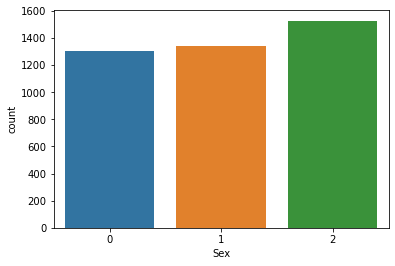

In [11]:
sns.countplot(x='Sex',data=df)
plt.show()

As we can see that their are more male abalone present in the dataset.

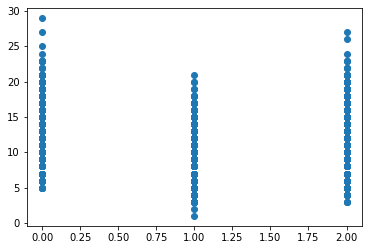

In [12]:
x= df['Sex']
y= df['Rings']
plt.scatter(x,y)
plt.show()

In [13]:
#Deriving Age from Rings Column, Age = Rings + 1.5'''
df['Age'] = df['Rings'] + 1.5

In [14]:
df['Age']

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
5        9.5
6       21.5
7       17.5
8       10.5
9       20.5
10      15.5
11      11.5
12      12.5
13      11.5
14      11.5
15      13.5
16       8.5
17      11.5
18       8.5
19      10.5
20      12.5
21      11.5
22      13.5
23      10.5
24      11.5
25      12.5
26      12.5
27      13.5
28      16.5
29      12.5
30      11.5
31      16.5
32      19.5
33      20.5
34      14.5
35       9.5
36      17.5
37       9.5
38      12.5
39      10.5
40      10.5
41      15.5
42       6.5
43       6.5
44       5.5
45       8.5
46      10.5
47       8.5
48       7.5
49      10.5
50       9.5
51       8.5
52      11.5
53      11.5
54       8.5
55       9.5
56       9.5
57       9.5
58       5.5
59       8.5
60       8.5
61      10.5
62      11.5
63       8.5
64       9.5
65       9.5
66      13.5
67      14.5
68      11.5
69       7.5
70      14.5
71       9.5
72      21.5
73      12.5
74      14.5
75      16.5
76      10.5

We can see the range of no of rings present in the Male,Female and infant abalone.

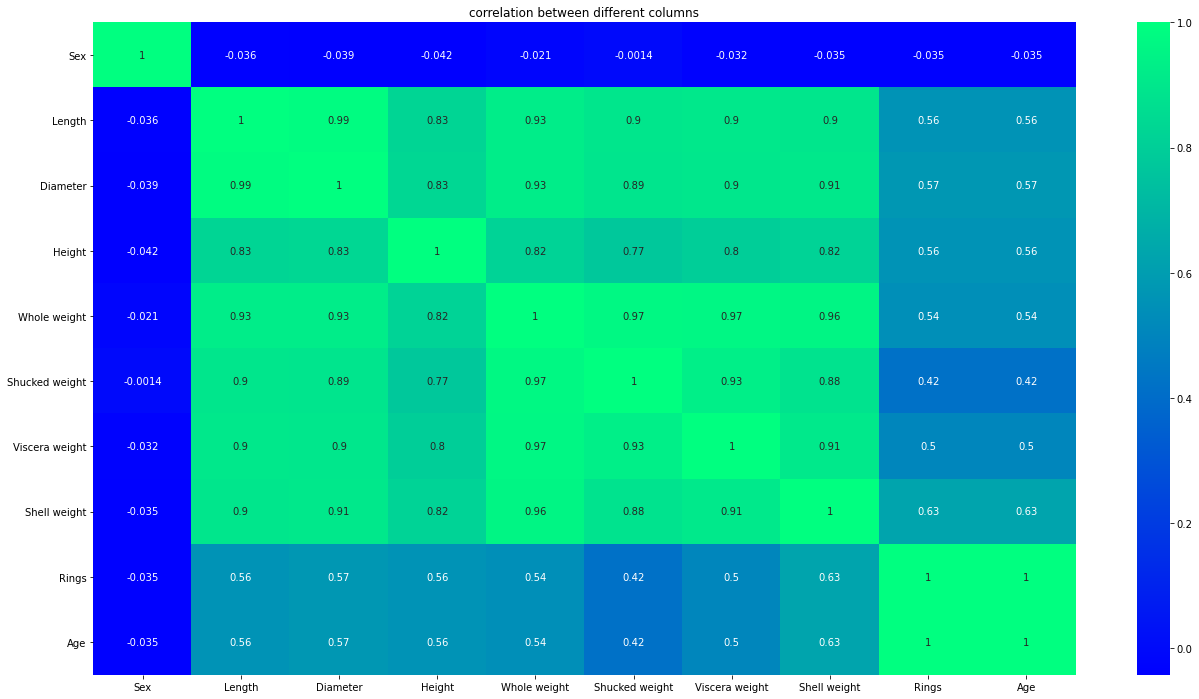

In [15]:
corr_df= df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_df,cmap="winter",annot=True)
plt.title('correlation between different columns')
plt.show()

As we can see that the correlation between rings and age and other columns are high.

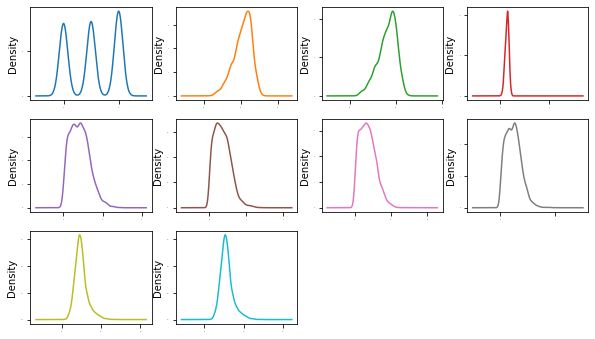

In [16]:
df.plot(kind='density',subplots=True,  layout=(6,4), sharex=False, legend=False, fontsize=1, figsize=(10,12))
plt.show()

array([[<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

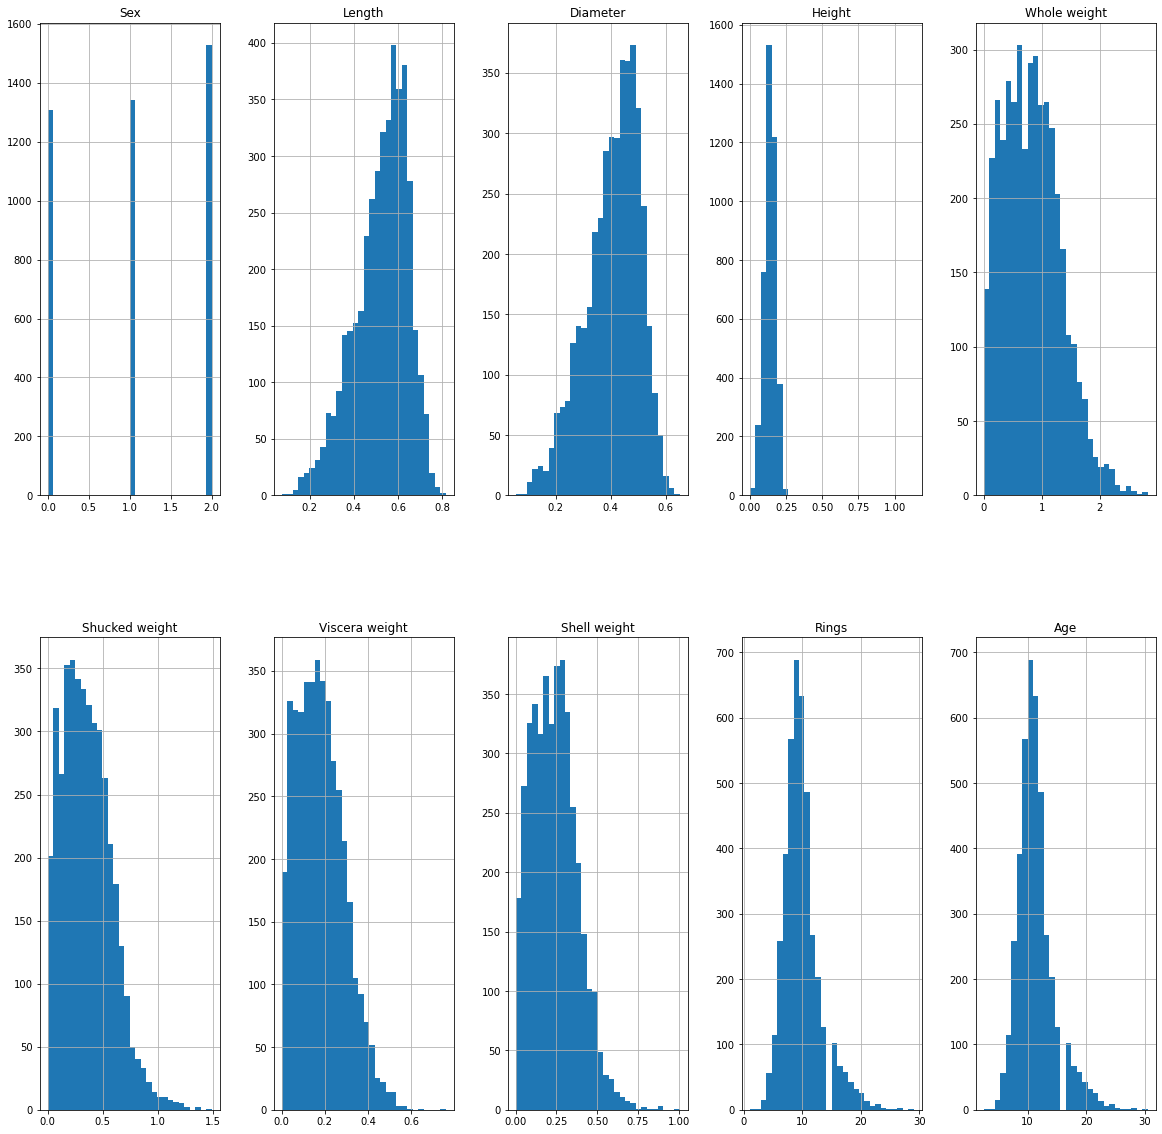

In [17]:
#'''Histogram : to see the numeric data distribution'''
df.hist(figsize=(20,20), grid = True, layout = (2,5), bins = 30)

'''After Seeing Above Graph of Data Distribution, I feel the Data is skewed, So checking for Skewness '''

In [18]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Age               1.114102
dtype: float64

As we can see that the columns 'length','diameter','height','whole-weight','shucked weight','viscera weight','shell weight' have skewness. so we have to remove skewness.

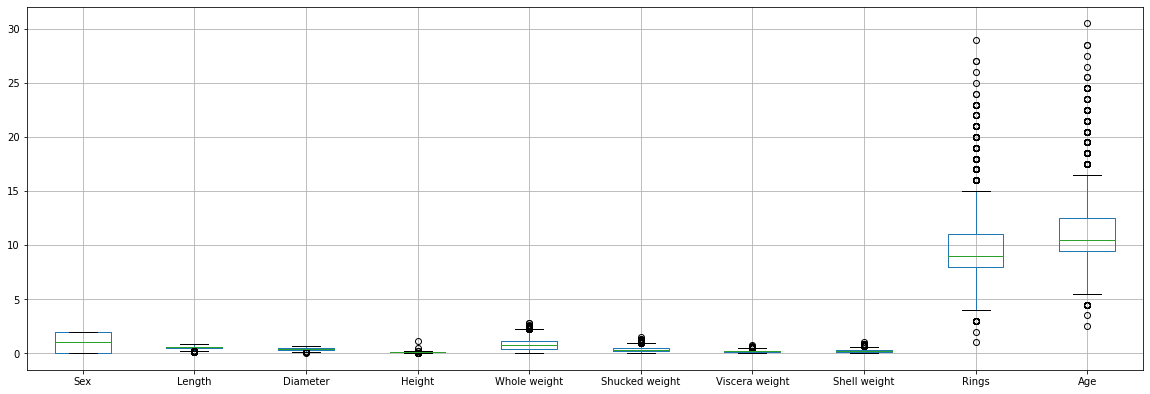

In [19]:
#checking the outliers
df.iloc[:,0:10].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

we have not removed Outliers because we have to capture all the type of different shapes and weights of abalone.

In [20]:
df

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       2   0.455     0.365   0.095        0.5140          0.2245   
1       2   0.350     0.265   0.090        0.2255          0.0995   
2       0   0.530     0.420   0.135        0.6770          0.2565   
3       2   0.440     0.365   0.125        0.5160          0.2155   
4       1   0.330     0.255   0.080        0.2050          0.0895   
5       1   0.425     0.300   0.095        0.3515          0.1410   
6       0   0.530     0.415   0.150        0.7775          0.2370   
7       0   0.545     0.425   0.125        0.7680          0.2940   
8       2   0.475     0.370   0.125        0.5095          0.2165   
9       0   0.550     0.440   0.150        0.8945          0.3145   
10      0   0.525     0.380   0.140        0.6065          0.1940   
11      2   0.430     0.350   0.110        0.4060          0.1675   
12      2   0.490     0.380   0.135        0.5415          0.2175   
13      0   0.535     0.405   0.145        0.6845          0.2725   
14      0   0.470     0.355   0.100        0.4755          0.1675   
15      2   0.500     0.400   0.130        0.6645          0.2580   
16      1   0.355     0.280   0.085        0.2905          0.0950   
17      0   0.440     0.340   0.100        0.4510          0.1880   
18      2   0.365     0.295   0.080        0.2555          0.0970   
19      2   0.450     0.320   0.100        0.3810          0.1705   
20      2   0.355     0.280   0.095        0.2455          0.0955   
21      1   0.380     0.275   0.100        0.2255          0.0800   
22      0   0.565     0.440   0.155        0.9395          0.4275   
23      0   0.550     0.415   0.135        0.7635          0.3180   
24      0   0.615     0.480   0.165        1.1615          0.5130   
25      0   0.560     0.440   0.140        0.9285          0.3825   
26      0   0.580     0.450   0.185        0.9955          0.3945   
27      2   0.590     0.445   0.140        0.9310          0.3560   
28      2   0.605     0.475   0.180        0.9365          0.3940   
29      2   0.575     0.425   0.140        0.8635          0.3930   
30      2   0.580     0.470   0.165        0.9975          0.3935   
31      0   0.680     0.560   0.165        1.6390          0.6055   
32      2   0.665     0.525   0.165        1.3380          0.5515   
33      0   0.680     0.550   0.175        1.7980          0.8150   
34      0   0.705     0.550   0.200        1.7095          0.6330   
35      2   0.465     0.355   0.105        0.4795          0.2270   
36      0   0.540     0.475   0.155        1.2170          0.5305   
37      0   0.450     0.355   0.105        0.5225          0.2370   
38      0   0.575     0.445   0.135        0.8830          0.3810   
39      2   0.355     0.290   0.090        0.3275          0.1340   
40      0   0.450     0.335   0.105        0.4250          0.1865   
41      0   0.550     0.425   0.135        0.8515          0.3620   
42      1   0.240     0.175   0.045        0.0700          0.0315   
43      1   0.205     0.150   0.055        0.0420          0.0255   
44      1   0.210     0.150   0.050        0.0420          0.0175   
45      1   0.390     0.295   0.095        0.2030          0.0875   
46      2   0.470     0.370   0.120        0.5795          0.2930   
47      0   0.460     0.375   0.120        0.4605          0.1775   
48      1   0.325     0.245   0.070        0.1610          0.0755   
49      0   0.525     0.425   0.160        0.8355          0.3545   
50      1   0.520     0.410   0.120        0.5950          0.2385   
51      2   0.400     0.320   0.095        0.3030          0.1335   
52      2   0.485     0.360   0.130        0.5415          0.2595   
53      0   0.470     0.360   0.120        0.4775          0.2105   
54      2   0.405     0.310   0.100        0.3850          0.1730   
55      0   0.500     0.400   0.140        0.6615          0.2565   
56      2   0.445     0.350   0.120        0.4425          0.1920   
57  

In [21]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Age               1.114102
dtype: float64

In [22]:
#splitting the dataset into independent and target variables in x and y respectively

x=df.drop(['Rings','Age','Sex'], axis=1)
y=df['Rings']

We can remove the 'sex' column as it will not help us to predict the no. of rings of the abalone.

In [23]:
#Removing the skewness from the data
dfa=power_transform(x)

dfa=pd.DataFrame(dfa,columns=x.columns)

In [24]:
dfa.shape

(4177, 7)

In [25]:
x=dfa

In [26]:
x.shape

(4177, 7)

In [27]:
y=pd.DataFrame(data=y,columns=['Rings'])

In [28]:
y

Rings
0        15
1         7
2         9
3        10
4         7
5         8
6        20
7        16
8         9
9        19
10       14
11       10
12       11
13       10
14       10
15       12
16        7
17       10
18        7
19        9
20       11
21       10
22       12
23        9
24       10
25       11
26       11
27       12
28       15
29       11
30       10
31       15
32       18
33       19
34       13
35        8
36       16
37        8
38       11
39        9
40        9
41       14
42        5
43        5
44        4
45        7
46        9
47        7
48        6
49        9
50        8
51        7
52       10
53       10
54        7
55        8
56        8
57        8
58        4
59        7
60        7
61        9
62       10
63        7
64        8
65        8
66       12
67       13
68       10
69        6
70       13
71        8
72       20
73       11
74       13
75       15
76        9
77       10
78       11
79       14
80        9
81       12
82       16
83       21
84       14
85       12
86       13
87       10
88        9
89       12
90       15
91       12
92       13
93       10
94       15
95       14
96        9
97        8
98        7
99       10
100       7
101      15
102      15
103      10
104      12
105      12
106      11
107      10
108       9
109       9
110       9
111       9
112       9
113       9
114      11
115      11
116      11
117      10
118       9
119       8
120       9
121       7
122      14
123       6
124       6
125       5
126       6
127       8
128      19
129      18
130      17
131       9
132       7
133       7
134       7
135       8
136       7
137       9
138       9
139       9
140      10
141      10
142      16
143      11
144      10
145      10
146      10
147       9
148       5
149       4
150      15
151       9
152      10
153      10
154      12
155      10
156      13
157      16
158      13
159      13
160      13
161      13
162      12
163      18
164      16
165      14
166      20
167      20
168      14
169      12
170      14
171       7
172       8
173       8
174       5
175       7
176       5
177       8
178       4
179      11
180      14
181      21
182      10
183      10
184      12
185      13
186      12
187      10
188      11
189       9
190      13
191      12
192      14
193       8
194      10
195      12
196      11
197      16
198      15
199      10
200       9
201      13
202      12
203      13
204       8
205       9
206       9
207       8
208      13
209       7
210      10
211       7
212      12
213       9
214      14
215      10
216       8
217       7
218      10
219       8
220       9
221      11
222       9
223      11
224      10
225       9
226       7
227       7
228      11
229      15
230      13
231      14
232      22
233       7
234      12
235       9
236       1
237       3
238       3
239       5
240      17
241       5
242       5
243       8
244       8
245      10
246      13
247       9
248       7
249       7
250       7
251      13
252      12
253      15
254      15
255      15
256      19
257      10
258      15
259      13
260      11
261      12
262      11
263       4
264       6
265      11
266      14
267       8
268       9
269      13
270      22
271      16
272      14
273      15
274      13
275      22
276      12
277      18
278      20
279      11
280      15
281       7
282       9
283      14
284      14
285      10
286      10
287      17
288       9
289      10
290      17
291      12
292      15
293      19
294      26
295       6
296       6
297       4
298      11
299       9
300       9
301      13
302       8
303       6
304      10
305       4
306       3
307      13
308      14
309      10
310      21
311      14
312      19
313      23
314      23
315       8
316      14
317      10
318      18
319       6
320       5
321       4
322      11
323       5
324       7
325       7
326       7
327      12
328       8
329       8
330      12
331       8
332       

In [29]:
y.shape

(4177, 1)

In [30]:
#finding best random state
maxscore=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33, random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_test)
    score=accuracy_score(preddtc,y_test)
    if score>maxscore:
        maxscore=score
        maxrs=i
print('best score is ',maxscore,'on random state is',i)

best score is  0.22552574329224076 on random state is 199


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=199)

In [32]:
model=[SVC(),RandomForestClassifier(),AdaBoostClassifier(),KNeighborsClassifier()]

In [33]:
for n in model:
    n.fit(x_train,y_train)
    n.score(x_train,y_train)
    predm=n.predict(x_test)
    print('accuracy score of',n,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of SVC() is:
0.2639593908629442
[[ 0  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7 12  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  7 28  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  3 28 35 10  4  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 19 54 38  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 22 61 66 17  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5 14 49 98 40 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 12 24 66 51 66  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  1 17 42 37 58  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10 25 25 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 11 13 28 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  9 17  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6 14 11 10  0  0  0  0  0  0  0  0 

accuracy score of KNeighborsClassifier() is:
0.22189992748368384
[[ 1  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  8  9  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5 10 17  6  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  6 23 30 11  5  2  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2 30 42 27  9  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  8 30 47 44 26  6  3  1  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9 21 46 73 43 20  4  2  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  5 10 24 71 59 33 10  5  0  1  1  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  7 14 40 44 33  8  8  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4 11 20 18 18  7  8  2  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  8 19 16 15  8  1  2  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2 10 10  5  4  0  1  1  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  2  5 14 10  2  0 

In [34]:
scrdtc=cross_val_score(dtc,x,y, cv=5)
print('cross validation score of DecisionTreeClassifier: ',scrdtc.mean())

cross validation score of DecisionTreeClassifier:  0.1956006646993095


In [35]:
scrsvc=cross_val_score(SVC(),x,y, cv=5)
print('cross validation score of SVC: ',scrsvc.mean())

cross validation score of SVC:  0.2707698478640804


In [36]:
scrrf=cross_val_score(RandomForestClassifier(),x,y, cv=5)
print('cross validation score of RandomForestClassifier: ',scrrf.mean())

cross validation score of RandomForestClassifier:  0.2398931323954961


In [37]:
scrada=cross_val_score(AdaBoostClassifier(),x,y, cv=5)
print('cross validation score of AdaBoostClassifier: ',scrada.mean())

cross validation score of AdaBoostClassifier:  0.21259691144027734


In [38]:
scrkn=cross_val_score(KNeighborsClassifier(),x,y, cv=5)
print('cross validation score of KNeighborsClassifier: ',scrkn.mean())

cross validation score of KNeighborsClassifier:  0.2176271380683609


As we can see Minimum difference in accuracy score and cross validation score is for RandomForestClassifier and KNeighborsClassifier (1) so they are our best models.

Doing GridSearchCV for getting best parameters



In [39]:
#creating parameter list to pass in GridSearchCV
parameters= {'criterion': ['gini', 'entropy'],
             'max_features': ['auto', 'sqrt', 'log2'],
             'class_weight': ['balanced', 'balanced_subsample'],}

In [40]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [41]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [42]:
#getting the best parameters found by GridSearchCV
GCV.best_params_

{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto'}

In [43]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [44]:
accuracy_score(GCV_pred,y_test)

0.2480058013052937

In [45]:
joblib.dump(GCV.best_estimator_,'Abalone_Case_study.obj')

['Abalone_Case_study.obj']